### Logistic Regression Vectorized

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline

In [237]:
iris = datasets.load_iris()
X = pd.DataFrame(iris.data[51:,:], columns=iris.feature_names)
y = iris.target[51:].reshape(99,1)
y=(y-min(y))/(max(y)-min(y))
print(X.shape)
print(y.shape)
print(np.unique(y))

(99, 4)
(99, 1)
[ 0.  1.]


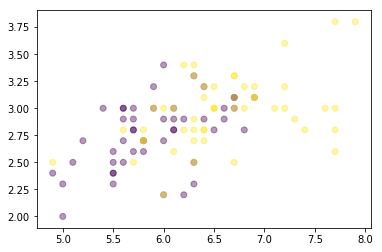

In [238]:
plt.figure(figsize=(6,4))
plt.scatter(X.iloc[:,0], X.iloc[:,1],c = y[:,0], alpha = .4)

In [234]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def initialize_with_zeros(dim):
    w = np.zeros(shape=(dim,1))
    b = 0
    return w, b

def propagate(w, b, X, Y):
    m = X.shape[1]
    A = sigmoid(np.dot(w.T, X) + b )
    cost = (-1/m) * (np.sum((Y * np.log(A)) + ((1-Y) * np.log(1-A))))
    dw = (1/m) * (np.dot(X,(A-Y).T))
    db = (1/m) * (np.sum(A-Y))
    cost = np.squeeze(cost)
    grads = {"dw": dw,
             "db": db}
    return grads, cost

def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    A = sigmoid(np.dot(w.T,X)+b)
    
    for i in range(A.shape[1]):
        if(A[0,i] >0.5):
            Y_prediction[0,i]=1
        else:
            Y_prediction[0,i]=0
        pass

    return Y_prediction

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []
    iterations = []
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        w = w - learning_rate * dw
        b = b - learning_rate * db
        if i % 100 == 0:
            costs.append(cost)
            iterations.append(i)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    params = {"w": w,
              "b": b}
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs, iterations

In [230]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.01, print_cost = False):
    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
    w, b = initialize_with_zeros(X_train.shape[0])
    
    parameters, grads, costs, iterations = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost = True)
    
    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "iterations":iterations,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [248]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [246]:
clf = model(X_train.T, y_train.T, X_test.T, y_test.T, num_iterations = 2000, learning_rate = 0.001, print_cost = True)
clf1 = model(X_train.T, y_train.T, X_test.T, y_test.T, num_iterations = 2000, learning_rate = 0.01, print_cost = True)
clf2 = model(X_train.T, y_train.T, X_test.T, y_test.T, num_iterations = 2000, learning_rate = 0.2, print_cost = True)

(4, 79) (1, 79) (4, 20) (1, 20)
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.670163
Cost after iteration 200: 0.665929
Cost after iteration 300: 0.662141
Cost after iteration 400: 0.658400
Cost after iteration 500: 0.654696
Cost after iteration 600: 0.651028
Cost after iteration 700: 0.647397
Cost after iteration 800: 0.643801
Cost after iteration 900: 0.640240
Cost after iteration 1000: 0.636714
Cost after iteration 1100: 0.633223
Cost after iteration 1200: 0.629766
Cost after iteration 1300: 0.626343
Cost after iteration 1400: 0.622954
Cost after iteration 1500: 0.619598
Cost after iteration 1600: 0.616274
Cost after iteration 1700: 0.612984
Cost after iteration 1800: 0.609725
Cost after iteration 1900: 0.606498
train accuracy: 55.696202531645575 %
test accuracy: 40.0 %
(4, 79) (1, 79) (4, 20) (1, 20)
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.636706
Cost after iteration 200: 0.603289
Cost after iteration 300: 0.572989
Cost after iteration 400: 0.545

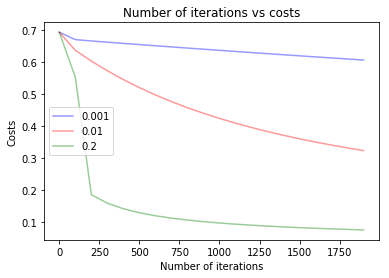

In [247]:
plt.plot(clf["iterations"], clf["costs"], c = "b", alpha = .4,label=clf["learning_rate"])
plt.plot(clf1["iterations"], clf1["costs"], c = "r", alpha = .4,label=clf1["learning_rate"])
plt.plot(clf2["iterations"], clf2["costs"], c = "g", alpha = .4,label=clf2["learning_rate"])
plt.xlabel("Number of iterations")
plt.ylabel("Costs")
plt.title("Number of iterations vs costs")
plt.legend()